In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
train_data = pd.read_csv('kc_house_train_data.csv', dtype= dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype= dtype_dict)
print ('Number of Training examples: {}'.format(len(train_data)))
print ('Number of Testing examples: {}'.format(len(test_data)))


Number of Training examples: 17384
Number of Testing examples: 4229


In [4]:
def data_prep(df, features, output):
    x = df[features].as_matrix()
    b = np.ones(shape=(len(x),1), dtype=np.float32)
    x = np.concatenate((b,x), axis=1)
    y = np.array(df[output])
    return x,y


In [49]:
class LinearRegression_GD:
    def __init__(self, train_x, train_y, test_x, test_y, init_weight, lr, tol):
        self.train_x = train_x
        self.train_y = train_y
        self.train_N = len(train_y)
        self.test_x = test_x
        self.test_y = test_y
        self.w = np.array(init_weight)
        self.lr = lr
        self.tol = tol
        
    def predict_outcome(self, feature_matrix, weights):
        predictions = np.dot(feature_matrix, weights)
        return predictions
    def error_calc(self, target, predictions):
        return (target - predictions)
    def RSS(self, error):
        return np.sum(error**2)
    def fit(self):
        Train_RSS=[]
        if self.w == None:
            self.w = np.zeros(shape=(self.train_x.shape[1]))
        converged = False
        while not converged:
            y_hat = self.predict_outcome(self.train_x, self.w)
            error = self.error_calc(self.train_y, y_hat)
            grad_w = self.gradient_calc(self.train_x, error)
            if np.sqrt(np.sum(grad_w**2)) < self.tol:
                converged = True
            else:
                self.w = self.update_w(self.w, grad_w, self.lr)
            r = self.RSS(error)
            print(r)
            Train_RSS.append(self.RSS(error))
        plt.plot(Train_RSS[:])
        plt.show()
        return self.w, Train_RSS[-1]
    def gradient_calc(self, features, error):
        grad = np.dot(features.T, error)
        return grad
    def update_w(self, weight, grad_w, lr):
        weight = weight + lr*grad_w
        return weight
    def test_RSS(self):
        test_x = self.test_x
        test_y = self.test_y
        weight = self.w
        test_predict= self.predict_outcome(feature_matrix=test_x, weights=weight)
        test_error = self.error_calc(target= test_y, predictions= test_predict)
        test_rss = self.RSS(error = test_error)
        return test_rss
    def predict(self, x):
        return np.dot(x, self.w)
            
                
    

In [50]:
np.sum(np.array([1, 2 ,3])**2)

14

In [51]:
md1_features = ['sqft_living']
md1_output= 'price'
md1_init_weight = [-47000, 1]
md1_step_size = 7e-12
md1_tolerance = 2.5e7

In [52]:
tr_md1_x, tr_md1_y  = data_prep(df=train_data, features=md1_features, output=md1_output)
tst_md1_x, tst_md1_y  = data_prep(df=test_data, features=md1_features, output=md1_output)
model1 = LinearRegression_GD(train_x=tr_md1_x, train_y=tr_md1_y, test_x=tst_md1_x, test_y=tst_md1_y, init_weight=md1_init_weight, lr=md1_step_size, tol=md1_tolerance)

C:\Users\Sayan\Anaconda3\envs\UdemyML\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


8.30218845342e+15
2.17477428517e+15
1.33521594045e+15
1.2201823888e+15
1.20442086599e+15
1.20226127344e+15
1.20196537309e+15
1.20192482979e+15
1.20191927468e+15
1.20191851354e+15
1.20191840925e+15
1.20191839496e+15
1.201918393e+15
1.20191839273e+15
1.2019183927e+15


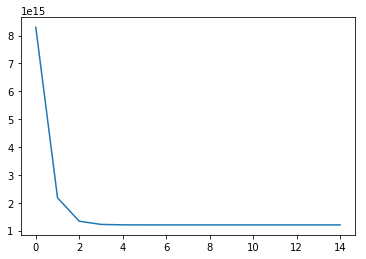

In [53]:
md1_w, md1_tr_RSS = model1.fit()

In [54]:
model1.predict(tst_md1_x[0,:])

356134.11685956357

In [55]:
md1_w

array([-46999.88714244,    281.91189091])

In [56]:
md2_features = ['sqft_living', 'sqft_living15']
md2_output = 'price'
md2_init_weight = [-100000, 1, 1]
md2_step_size = 4e-12
md2_tolerance = 1e9


In [57]:
tr_md2_x, tr_md2_y  = data_prep(df=train_data, features=md2_features, output=md2_output)
tst_md2_x, tst_md2_y  = data_prep(df=test_data, features=md2_features, output=md2_output)
model2 = LinearRegression_GD(train_x=tr_md2_x, train_y=tr_md2_y, test_x=tst_md2_x, test_y=tst_md2_y, init_weight=md2_init_weight, lr=md2_step_size, tol=md2_tolerance)

In [58]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

C:\Users\Sayan\Anaconda3\envs\UdemyML\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


9.37862834398e+15
2.1970812477e+15
1.3418526519e+15
1.23928742845e+15
1.22628604788e+15
1.2239589477e+15
1.22292017353e+15
1.22205264208e+15
1.22122302986e+15
1.22041506149e+15
1.2196263966e+15
1.21885636222e+15
1.21810449303e+15
1.21737035752e+15
1.21665353705e+15
1.2159536232e+15
1.21527021722e+15
1.21460292975e+15
1.21395138063e+15
1.21331519866e+15
1.2126940214e+15
1.21208749495e+15
1.21149527377e+15
1.21091702047e+15
1.21035240559e+15
1.20980110747e+15
1.20926281202e+15
1.20873721258e+15
1.20822400969e+15
1.20772291099e+15
1.20723363098e+15
1.20675589091e+15
1.20628941861e+15
1.20583394832e+15
1.20538922055e+15
1.20495498194e+15
1.20453098509e+15
1.20411698845e+15
1.20371275615e+15
1.20331805789e+15
1.20293266882e+15
1.20255636936e+15
1.20218894513e+15
1.20183018682e+15
1.20147989002e+15
1.20113785516e+15
1.2008038874e+15
1.20047779644e+15
1.20015939653e+15
1.19984850626e+15
1.19954494851e+15
1.19924855034e+15
1.19895914289e+15
1.19867656127e+15
1.1984006445e+15
1.19813123538e+15


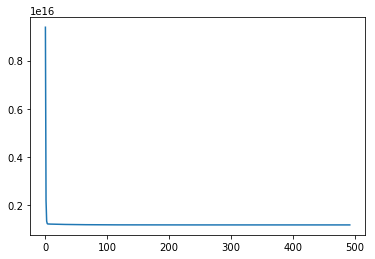

In [59]:
md2_w, md2_tr_RSS = model2.fit()

In [60]:
model2.predict(tst_md2_x[0,:])

366708.98997341539

In [61]:
tst_md2_y[0]

310000.0

In [62]:
model1.test_RSS()

275400049344913.56

In [63]:
model2.test_RSS()

270257958489731.56

In [64]:
md2_w

array([ -9.99999687e+04,   2.44958104e+02,   6.54038592e+01])